In [14]:
import numpy as np

In [15]:
list1 = [1,2,3,4,5]
print(list1[0])

1


In [16]:
def model1(metrage: int) -> int:
    price = metrage * 1000
    return price

def model2(metrage, price):
    if price > 400000:
        result = "Iran"
    elif price > 300000:
        result = "USA"
    else:
        result = "India"
    return result

# Input
input_metrage = 500

# Prediction
predicted_price = model1(input_metrage)

predicted_country = model2(input_metrage, predicted_price)
predicted_country = model2(input_metrage, input_metrage * 1000)


In [17]:
# Data
# X:   x0 x1 x2      y
# X_1:  1  4  5     10
# X_2:  3 -5  6      1
# X_3:  2  0 10      6
# X_4: -5 12  3     -4

X_1 = np.array([1,4,5]) 
X_2 = np.array([3, -5, 6])
X_3 = np.array([2, 0, 10])
X_4 = np.array([-5, 12, 3])
X = np.array([ X_1, X_2, X_3, X_4 ])

print(X)

[[ 1  4  5]
 [ 3 -5  6]
 [ 2  0 10]
 [-5 12  3]]


In [18]:
# Tuple
tuple1 = (97,2)

tuple1[1]

2

In [19]:
def my_load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    return data

data1 = my_load_data()
print("Shape of data1: ", data1.shape)

data2 = np.ndarray((10, 3)) # 10 x 3
print("data2: ", data2)

Shape of data1:  (97, 2)
data2:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [20]:
x_train = data1[:,0]
y_train = data1[:,1]

In [21]:
x_train.shape

# 1-dim -> shape (dim1)
# 2-dim -> shape (dim1, dim2)
# 3-dim -> shape (dim1, dim2, dim3)
# ...
# 1000-dim -> shape (dim1, dim2, ..., dim1000)

(97,)

In [22]:
(97,2,100)[2]

100

---
Numpy array operations

In [28]:
arr1 = np.array([1,2,3,4,5])

result1 = arr1 * 2
print("result1: ", result1)

result2 = arr1 + 2
print("result2: ", result2)

arr2 = np.array([10, 20, 30, 40, 50])
result3 = arr1 + arr2
print("result3: ", result3)

result4 = arr1 * arr2
print("result4: ", result4)

result1:  [ 2  4  6  8 10]
result2:  [3 4 5 6 7]
result3:  [11 22 33 44 55]
result4:  [ 10  40  90 160 250]


---
`ipywidgets` example

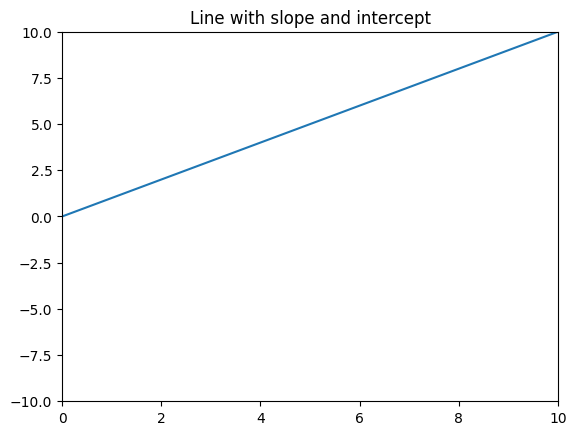

interactive(children=(FloatSlider(value=1.0, description='slope', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Generate 200 evenly spaced x values from 0 → 10
x = np.linspace(start=0, stop=10, num=200)

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title("Line with slope and intercept")

# Plot initial line y = x
(line,) = ax.plot(x, x)
ax.set_ylim(bottom=-10, top=10)
ax.set_xlim(left=0, right=10)

plt.close(fig)  # stop ipywidgets from "auto-displaying" the plot. we will use `display()` later.

def update(slope, intercept):
    # Update y-values only
    line.set_ydata(slope * x + intercept)
    fig.canvas.draw_idle()

# Create widget controller (no auto-display)
controls = widgets.interactive(
    update,
    slope=widgets.FloatSlider(value=1, min=-5, max=5, step=0.1),
    intercept=widgets.FloatSlider(value=0, min=-5, max=5, step=0.1),
)

# Display order: figure first, widgets second
display(fig)
display(controls)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget

# data
data_x = np.array([1,2,3,4,5])
data_y = np.array([2,4,6,8,9])

def pred(w, b, x):
    return w * x + b

def loss_summary(x, y, w, b):
    preds = pred(w, b, x)
    e = (y - preds) ** 2
    print("preds:", preds, "e:", e)
    print("j(w,b):", sum(e))

# build plot without auto-display
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.ion()
ax.set_ylim(bottom=0, top=10)
ax.set_xlim(left=0, right=10)
ax.scatter(data_x, data_y)
(line,) = ax.plot(data_x, pred(1, 0, data_x))

# sliders
w_slider = widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='w')
b_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='b')

# update

def update(change=None):
    w = w_slider.value
    b = b_slider.value
    line.set_ydata(pred(w, b, data_x))
    fig.canvas.draw_idle()

for s in (w_slider, b_slider):
    s.observe(update, names='value')

# initial draw and diagnostics
update()
loss_summary(data_x, data_y, w_slider.value, b_slider.value)

controls = widgets.VBox([w_slider, b_slider])
layout = widgets.VBox([controls, fig.canvas])
display(layout)

preds: [1. 2. 3. 4. 5.] e: [ 1.  4.  9. 16. 16.]
j(w,b): 46.0
